# Lecture 5: Introduction to Pandas

(Summer 2023)

## Pandas

The Pandas package is built on top of numpy. It gives us an efficient implementation of something called a `DataFrame`, which are multi-dimensional arrays that have attached row and column labels and can hold heterogeneous data and missing values.

The package is particularly good for data wrangling tasks such as grouping and pivot tables.

There are three main Pandas data structures: `Series`, `DataFrame`, and `Index`

For documentation and tutorials see ...

Also see: <a href="https://pandas.pydata.org/docs/" target="_blank">Pandas Documentation</a>

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la

In [2]:
# What version of pandas are we running ... ?
pd.__version__

'1.2.4'

## Series

A Pandas series is a one-dimensional array of indexed data. There are a number of ways to create one ...

In [3]:
# From a list ...
L1 = [0.1, 0.2, 0.5, 0.7, 0.9];
type(L1)

list

In [4]:
Ldata = pd.Series(L1)
print(Ldata)
print(type(Ldata))

0    0.1
1    0.2
2    0.5
3    0.7
4    0.9
dtype: float64
<class 'pandas.core.series.Series'>


In [5]:
Ldata.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
type(Ldata.index)

pandas.core.indexes.range.RangeIndex

In [7]:
Ldata.values

array([0.1, 0.2, 0.5, 0.7, 0.9])

In [8]:
type(Ldata.values)

numpy.ndarray

### Data in a Pandas Series can be accessed analogously to a numpy array ...

In [9]:
Ldata[3]

0.7

In [10]:
type(Ldata[3])

numpy.float64

In [11]:
Ldata[2:4]

2    0.5
3    0.7
dtype: float64

In [12]:
type(Ldata[2:4])

pandas.core.series.Series

### Numpy array vs. Pandas Series ...

A numpy array has an **implicitly** defined index while a pandas series object has an **explicitely** defined index. And the index does not have to be an integer.

In [13]:
Ldata = pd.Series(L1,index=['cat','dog',42, 'A','3'])

In [14]:
Ldata

cat    0.1
dog    0.2
42     0.5
A      0.7
3      0.9
dtype: float64

In [15]:
type(Ldata)

pandas.core.series.Series

In [16]:
Ldata['dog']

0.2

In [17]:
Ldata.values

array([0.1, 0.2, 0.5, 0.7, 0.9])

In [18]:
Ldata.index

Index(['cat', 'dog', 42, 'A', '3'], dtype='object')

### Pandas Series vs. Dictionary ...

A pandas series is similar to a dictionary object which maps arbitrary keys to arbitrary values. A pandas series is a dictionary that maps typed keys to typed values ...

Recall ...

### <u>Dictionaries</u> are unordered, changeable, and indexed. Written with "{}" but made up of key-value pairs. 

A **key-value pair** is a pair of strings separated by a colon. Different key-value pairs are separated by commas. It looks like `{"key1": "value1", "key2: "value2"}`.

In [19]:
# Make some dictionaries of farm equipment.
OldCombine = {"brand": "CASE", "model": "7130", "year": 2014}
NewCombine = {"brand": "CASE", "model": "8240", "year": 2016}
Tractor1 = {"brand": "CASE", "model": "290", "year": 2013}
Pickup = {"brand": "CHEVY", "model": "Silverado", "year": 2005}
FavoriteOldCombineEver = {"brand": "JD", "model": "7720", "year": 1978, "color": "green"}

# Create a dictionary of farm equipment from the dictionaries of
# individual machines.

FarmEquipment = {"C1": OldCombine, "C2": NewCombine, "T1": Tractor1, "P1": Pickup, "C3": FavoriteOldCombineEver}
print(FarmEquipment)

{'C1': {'brand': 'CASE', 'model': '7130', 'year': 2014}, 'C2': {'brand': 'CASE', 'model': '8240', 'year': 2016}, 'T1': {'brand': 'CASE', 'model': '290', 'year': 2013}, 'P1': {'brand': 'CHEVY', 'model': 'Silverado', 'year': 2005}, 'C3': {'brand': 'JD', 'model': '7720', 'year': 1978, 'color': 'green'}}


In [20]:
FarmEquipment.keys()

dict_keys(['C1', 'C2', 'T1', 'P1', 'C3'])

In [21]:
FarmEquipment.values()

dict_values([{'brand': 'CASE', 'model': '7130', 'year': 2014}, {'brand': 'CASE', 'model': '8240', 'year': 2016}, {'brand': 'CASE', 'model': '290', 'year': 2013}, {'brand': 'CHEVY', 'model': 'Silverado', 'year': 2005}, {'brand': 'JD', 'model': '7720', 'year': 1978, 'color': 'green'}])

In [22]:
newLdata = pd.Series(FarmEquipment)

In [23]:
newLdata

C1     {'brand': 'CASE', 'model': '7130', 'year': 2014}
C2     {'brand': 'CASE', 'model': '8240', 'year': 2016}
T1      {'brand': 'CASE', 'model': '290', 'year': 2013}
P1    {'brand': 'CHEVY', 'model': 'Silverado', 'year...
C3    {'brand': 'JD', 'model': '7720', 'year': 1978,...
dtype: object

In [24]:
newLdata.index

Index(['C1', 'C2', 'T1', 'P1', 'C3'], dtype='object')

In [25]:
newLdata.values

array([{'brand': 'CASE', 'model': '7130', 'year': 2014},
       {'brand': 'CASE', 'model': '8240', 'year': 2016},
       {'brand': 'CASE', 'model': '290', 'year': 2013},
       {'brand': 'CHEVY', 'model': 'Silverado', 'year': 2005},
       {'brand': 'JD', 'model': '7720', 'year': 1978, 'color': 'green'}],
      dtype=object)

In [26]:
newLdata['T1']

{'brand': 'CASE', 'model': '290', 'year': 2013}

## We will return to this connection between `dictionaries` and `dataframes` later ...

## Dataframes

A Pandas `DataFrame` is an analog of a two-dimensional array where both the row indexes and the column names are flexible ...

In [27]:
# Create some data to play with ... Area in square miles, population in # people

area_dict = {'Alaska': 665400, 'California': 163696, 'Texas': 268597, 'New York': 54556, 'Florida': 65758, 'Illinois': 57915, 'Indiana': 35826, 'Colorado': 104185}

In [28]:
area = pd.Series(area_dict)
area

Alaska        665400
California    163696
Texas         268597
New York       54556
Florida        65758
Illinois       57915
Indiana        35826
Colorado      104185
dtype: int64

In [29]:
pop_dict = {'Alaska': 732673, 'California': 39240000, 'Texas': 29530000, 'New York': 19840000, 'Florida': 21780000, 'Illinois': 12670000, 'Indiana': 6806000, 'Colorado': 5812000}

In [30]:
population = pd.Series(pop_dict)
population

Alaska          732673
California    39240000
Texas         29530000
New York      19840000
Florida       21780000
Illinois      12670000
Indiana        6806000
Colorado       5812000
dtype: int64

## We can create a dataframe from these two series, which have the same index set

In [31]:
# Make a DataFrame ...

states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
Alaska,732673,665400
California,39240000,163696
Texas,29530000,268597
New York,19840000,54556
Florida,21780000,65758
Illinois,12670000,57915
Indiana,6806000,35826
Colorado,5812000,104185


In [32]:
states.index

Index(['Alaska', 'California', 'Texas', 'New York', 'Florida', 'Illinois',
       'Indiana', 'Colorado'],
      dtype='object')

In [33]:
# A DataFrame also has a .columns attribute ...

states.columns

Index(['population', 'area'], dtype='object')

## Looking through the data ...

In [34]:
states.head(3)

,population,area
Alaska,732673,665400
California,39240000,163696
Texas,29530000,268597


In [35]:
states.tail(2)

,population,area
Indiana,6806000,35826
Colorado,5812000,104185


In [36]:
# Summary description of data ...

states.describe()

,population,area
count,8.000000e+00,8.000000
mean,1.705133e+07,176991.625000
std,1.306563e+07,211755.331081
min,7.326730e+05,35826.000000
25%,6.557500e+06,57075.250000
50%,1.625500e+07,84971.500000
75%,2.371750e+07,189921.250000
max,3.924000e+07,665400.000000


In [37]:
# Transpose your data ...

states.T

,Alaska,California,Texas,New York,Florida,Illinois,Indiana,Colorado
population,732673,39240000,29530000,19840000,21780000,12670000,6806000,5812000
area,665400,163696,268597,54556,65758,57915,35826,104185


In [38]:
# A dataframe is a two-dimensional object. As such, it has two axes ...
# axis 0 refers to the rows and axis 1 refers to the columns. Here we
# sort on index ...

states.sort_index(axis=1, ascending=True)

,area,population
Alaska,665400,732673
California,163696,39240000
Texas,268597,29530000
New York,54556,19840000
Florida,65758,21780000
Illinois,57915,12670000
Indiana,35826,6806000
Colorado,104185,5812000


In [39]:
states.sort_index(axis=1, ascending=False)

,population,area
Alaska,732673,665400
California,39240000,163696
Texas,29530000,268597
New York,19840000,54556
Florida,21780000,65758
Illinois,12670000,57915
Indiana,6806000,35826
Colorado,5812000,104185


In [40]:
states.sort_index(axis=0, ascending=True)

,population,area
Alaska,732673,665400
California,39240000,163696
Colorado,5812000,104185
Florida,21780000,65758
Illinois,12670000,57915
Indiana,6806000,35826
New York,19840000,54556
Texas,29530000,268597


In [41]:
# Sort on values ...

states.sort_values(by="area")

,population,area
Indiana,6806000,35826
New York,19840000,54556
Illinois,12670000,57915
Florida,21780000,65758
Colorado,5812000,104185
California,39240000,163696
Texas,29530000,268597
Alaska,732673,665400


In [42]:
states.sort_values(by="population")

,population,area
Alaska,732673,665400
Colorado,5812000,104185
Indiana,6806000,35826
Illinois,12670000,57915
New York,19840000,54556
Florida,21780000,65758
Texas,29530000,268597
California,39240000,163696


## DataFrame to Numpy ...

In [43]:
x = states.to_numpy()

In [44]:
type(x)

numpy.ndarray

In [45]:
x

array([[  732673,   665400],
       [39240000,   163696],
       [29530000,   268597],
       [19840000,    54556],
       [21780000,    65758],
       [12670000,    57915],
       [ 6806000,    35826],
       [ 5812000,   104185]])

## There are many more ways to select and view. See the very nice tutorial at ...

<a href="https://pandas.pydata.org/docs/user_guide/10min.html" target="_blank">10 Minutes to Pandas</a>


## Exercise: Open up the Tutorial and Work Some Examples Using the DataFrames We've Made Above ...

## Solution ...

## Example Data ...

I will want some data to illustrate Pandas concepts. For this I will use the wheat yields data set shared earlier. 

Pandas provides many methods and functions to implement the wrangling code we've been using up until now.

One function of particular use is `pandas.read_csv()` ...

<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html" target="_blank">Pandas Read CSV</a>

<a href="https://pythonbasics.org/read-csv-with-pandas/" target="_blank">Pandas Tutorial</a>



In [46]:
# Working with wheat yields again ...

csv_file_name = 'Data/WheatYields.csv'
WheatYields = pd.read_csv(csv_file_name)

In [47]:
type(WheatYields)

pandas.core.frame.DataFrame

In [48]:
WheatYields.index

RangeIndex(start=0, stop=35112, step=1)

In [49]:
WheatYields.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [50]:
Value = WheatYields['Value']

In [51]:
type(Value)

pandas.core.series.Series

In [52]:
Value

0        35.0
1        60.0
2        57.5
3        48.0
4         0.0
         ... 
35107    14.0
35108    13.5
35109    13.5
35110    13.5
35111    15.0
Name: Value, Length: 35112, dtype: float64

In [53]:
print(WheatYields)

      Program  Year Period  Week Ending Geo Level       State  State ANSI  \
0      SURVEY  2007   YEAR          NaN    COUNTY  CALIFORNIA           6   
1      SURVEY  2007   YEAR          NaN    COUNTY  CALIFORNIA           6   
2      SURVEY  2007   YEAR          NaN    COUNTY  CALIFORNIA           6   
3      SURVEY  2007   YEAR          NaN    COUNTY  CALIFORNIA           6   
4      SURVEY  2007   YEAR          NaN    COUNTY  CALIFORNIA           6   
...       ...   ...    ...          ...       ...         ...         ...   
35107  SURVEY  1929   YEAR          NaN    COUNTY    COLORADO           8   
35108  SURVEY  1929   YEAR          NaN    COUNTY    COLORADO           8   
35109  SURVEY  1929   YEAR          NaN    COUNTY    COLORADO           8   
35110  SURVEY  1929   YEAR          NaN    COUNTY    COLORADO           8   
35111  SURVEY  1929   YEAR          NaN    COUNTY    COLORADO           8   

         Ag District  Ag District Code                     County  ...  \
0

In [54]:
WheatYields

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2007,YEAR,NaN,COUNTY,CALIFORNIA,6,CENTRAL COAST,40,CONTRA COSTA,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,35.0,NaN
1,SURVEY,2007,YEAR,NaN,COUNTY,CALIFORNIA,6,CENTRAL COAST,40,MONTEREY,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,60.0,NaN
2,SURVEY,2007,YEAR,NaN,COUNTY,CALIFORNIA,6,CENTRAL COAST,40,OTHER (COMBINED) COUNTIES,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,57.5,NaN
3,SURVEY,2007,YEAR,NaN,COUNTY,CALIFORNIA,6,CENTRAL COAST,40,SAN LUIS OBISPO,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,48.0,NaN
4,SURVEY,2007,YEAR,NaN,COUNTY,CALIFORNIA,6,NORTHEAST,30,LASSEN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,SURVEY,1929,YEAR,NaN,COUNTY,COLORADO,8,SOUTHWEST,70,MESA,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,14.0,NaN
35108,SURVEY,1929,YEAR,NaN,COUNTY,COLORADO,8,SOUTHWEST,70,MONTEZUMA,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,13.5,NaN
35109,SURVEY,1929,YEAR,NaN,COUNTY,COLORADO,8,SOUTHWEST,70,MONTROSE,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,13.5,NaN
35110,SURVEY,1929,YEAR,NaN,COUNTY,COLORADO,8,SOUTHWEST,70,OURAY,...,NaN,NaN,0,NaN,WHEAT,"WHEAT, NON-IRRIGATED - YIELD, MEASURED IN BU /...",TOTAL,NOT SPECIFIED,13.5,NaN


In [55]:
NewWheatYields = WheatYields[['Year','State','County','County ANSI','Value']]

In [56]:
NewWheatYields

,Year,State,County,County ANSI,Value
0,2007,CALIFORNIA,CONTRA COSTA,13.0,35.0
1,2007,CALIFORNIA,MONTEREY,53.0,60.0
2,2007,CALIFORNIA,OTHER (COMBINED) COUNTIES,NaN,57.5
3,2007,CALIFORNIA,SAN LUIS OBISPO,79.0,48.0
4,2007,CALIFORNIA,LASSEN,35.0,0.0
...,...,...,...,...,...
35107,1929,COLORADO,MESA,77.0,14.0
35108,1929,COLORADO,MONTEZUMA,83.0,13.5
35109,1929,COLORADO,MONTROSE,85.0,13.5
35110,1929,COLORADO,OURAY,91.0,13.5


In [57]:
type(NewWheatYields)

pandas.core.frame.DataFrame

In [58]:
NewWheatYields['State'].unique()

array(['CALIFORNIA', 'COLORADO', 'IDAHO', 'KANSAS', 'MONTANA', 'NEBRASKA',
       'NEW MEXICO', 'OKLAHOMA', 'OREGON', 'SOUTH DAKOTA', 'TEXAS',
       'UTAH', 'WASHINGTON', 'WYOMING', 'NORTH DAKOTA'], dtype=object)

In [59]:
JustCalif = (NewWheatYields['State'] == 'CALIFORNIA')

In [60]:
JustCalif

0         True
1         True
2         True
3         True
4         True
         ...  
35107    False
35108    False
35109    False
35110    False
35111    False
Name: State, Length: 35112, dtype: bool

In [61]:
JustCalifYields = NewWheatYields.loc[JustCalif]

In [62]:
JustCalifYields

,Year,State,County,County ANSI,Value
0,2007,CALIFORNIA,CONTRA COSTA,13.0,35.0
1,2007,CALIFORNIA,MONTEREY,53.0,60.0
2,2007,CALIFORNIA,OTHER (COMBINED) COUNTIES,NaN,57.5
3,2007,CALIFORNIA,SAN LUIS OBISPO,79.0,48.0
4,2007,CALIFORNIA,LASSEN,35.0,0.0
...,...,...,...,...,...
24876,1974,CALIFORNIA,RIVERSIDE,65.0,16.8
24877,1974,CALIFORNIA,SAN BERNARDINO,71.0,30.0
24878,1974,CALIFORNIA,SAN DIEGO,73.0,31.2
24879,1974,CALIFORNIA,SANTA BARBARA,83.0,15.8


## Exercise: Create the Time Series of Wheat Yields for Some Favorite Counties, Plot over time and compare ...

## Solution ...

## Cities and Towns of the US Data Set ...

In [63]:
WheatYields = pd.read_csv('Data/WheatYields--Wrangled.csv')
CitiesAndTowns = pd.read_csv('Data/Wrangled-cities-and-towns-of-the-united-states.csv')

In [64]:
WheatYields

,Year,State,State ANSI,County,County ANSI,Value
0,2007,CALIFORNIA,6,CONTRA COSTA,13,35.0
1,2007,CALIFORNIA,6,MONTEREY,53,60.0
2,2007,CALIFORNIA,6,SAN LUIS OBISPO,79,48.0
3,2007,CALIFORNIA,6,LASSEN,35,0.0
4,2007,CALIFORNIA,6,MODOC,49,0.0
...,...,...,...,...,...,...
34111,1929,COLORADO,8,MESA,77,14.0
34112,1929,COLORADO,8,MONTEZUMA,83,13.5
34113,1929,COLORADO,8,MONTROSE,85,13.5
34114,1929,COLORADO,8,OURAY,91,13.5


In [65]:
CitiesAndTowns

,FEATURE,FEATURE2,NAME,POP 2010,COUNTY,COUNTY FIPS,STATE,STATE FIPS,LATITUDE,LONGITUDE
0,Civil,County Seat,Prineville,9253,Crook,13,OR,41,44.299849,-120.834466
1,Civil,County Seat,Logan,48174,Cache,5,UT,49,41.735486,-111.834388
2,Civil,-999,Basalt,3857,Eagle,37,CO,8,39.368873,-107.032824
3,Civil,-999,Moroni,1423,Sanpete,39,UT,49,39.524962,-111.590473
4,Civil,County Seat,Littleton,41737,Arapahoe,5,CO,8,39.613321,-105.016650
...,...,...,...,...,...,...,...,...,...,...
38174,Populated Place,-999,Yoman,-999,Pierce,53,WA,53,47.186485,-122.706242
38175,Census,-999,Elberta,256,Utah,49,UT,49,39.952428,-111.955957
38176,Populated Place,-999,Farmington,-999,Cecil,15,MD,24,39.678623,-76.032107
38177,Populated Place,-999,Centredale,-999,Providence,7,RI,44,41.856492,-71.478690


## What I'd like to do ...

### Merge these two tables to create a single table with the following columns ...

Year, State Ansi/Fips, County Ansi/Fips, Latitude, Longitude, Value (wheat yield in bu/acre)

This really amounts to deleting certain columns from the WheatYields dataframe and adding the columns for latitude and longitude

### But first, let's use these as examples to explore operations in pandas ...

`CitiesAndTowns` and `WheatYields` are examples of dataframes. Think of these as either a generalization of a numpy array or as a specialization of a python dictionary.

The values in a dataframe are typed in the sense that the elements in a single column must be of the same type. In addition, a dataframe has associated index and columns ...

In [66]:
CitiesAndTowns.index

RangeIndex(start=0, stop=38179, step=1)

In [67]:
CitiesAndTowns.columns

Index(['FEATURE', 'FEATURE2', 'NAME', 'POP 2010', 'COUNTY', 'COUNTY FIPS',
       'STATE', 'STATE FIPS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [68]:
WheatYields.index

RangeIndex(start=0, stop=34116, step=1)

In [69]:
WheatYields.columns

Index(['Year', 'State', 'State ANSI', 'County', 'County ANSI', 'Value'], dtype='object')

### There are a number of ways to construct DataFrames, but we have two of them already, so maybe more interested in this later. The ways are:

From a Series
From a list of dictionaries
From a dictionary of Series objects
From a two-dimensional numpy array
From a numpy structured array

Come back to these later ...

## Data Indexing and Selection with DataFrames ...

Recall some of the ways to access, set, and modify values in a numpy array. These include

indexing ... e.g., array[3,7]
slicing ... e.g., array[:,3:11]
masking ... e.g., array[array > 0}

In [70]:
# Explore this for Series. Construct one from our DataFrames ...

LatSeries = CitiesAndTowns['LATITUDE']
print(LatSeries)

0        44.299849
1        41.735486
2        39.368873
3        39.524962
4        39.613321
           ...    
38174    47.186485
38175    39.952428
38176    39.678623
38177    41.856492
38178    39.764337
Name: LATITUDE, Length: 38179, dtype: float64


In [71]:
LatSeries.keys()

RangeIndex(start=0, stop=38179, step=1)

In [72]:
LatSeries[4]

39.613321

In [73]:
print(list(LatSeries.items()))

[(0, 44.2998485), (1, 41.7354862), (2, 39.3688731), (3, 39.5249615), (4, 39.613321), (5, 38.9688524), (6, 37.9060368), (7, 38.0171441), (8, 37.3021633), (9, 36.8588376), (10, 36.7045924), (11, 35.6224561), (12, 35.2597744), (13, 34.6126328), (14, 34.1991718), (15, 33.6130942), (16, 33.6609389), (17, 32.4373434), (18, 33.0534563), (19, 32.7667955), (20, 32.7448315), (21, 32.2334808), (22, 32.482361), (23, 32.2137484), (24, 32.4698522), (25, 32.181821), (26, 31.9895873), (27, 31.4676687), (28, 31.6798895), (29, 30.7593452), (30, 30.3882613), (31, 30.3810404), (32, 29.9891052), (33, 29.7632836), (34, 29.5446753), (35, 29.4641219), (36, 28.3325002), (37, 27.9222444), (38, 26.4106186), (39, 26.1497977), (40, 26.233406), (41, 48.3955535), (42, 48.4632763), (43, 48.5214995), (44, 46.7909974), (45, 46.4476278), (46, 45.688996), (47, 45.3840077), (48, 44.621507), (49, 44.8752464), (50, 43.886579), (51, 42.1363544), (52, 40.3772059), (53, 39.8680412), (54, 39.1404477), (55, 38.208313), (56, 38.0

In [74]:
# Slicing

LatSeries[1:7]

1    41.735486
2    39.368873
3    39.524962
4    39.613321
5    38.968852
6    37.906037
Name: LATITUDE, dtype: float64

In [75]:
# Masking ...

LatSeries[(LatSeries > 40.0) & (LatSeries < 42.0)]

1        41.735486
52       40.377206
90       41.895521
91       40.233317
149      41.230451
           ...    
38151    41.543587
38152    40.907321
38153    40.798711
38154    40.704912
38177    41.856492
Name: LATITUDE, Length: 6930, dtype: float64

### Indexers ...

There is some danger of confusion between the explicit index and an implicit index. This comes up when the index set is a range as it is in these two examples. In order to avoid such problems it is recommended to use the following indexers ...

loc --> **explicit** index
iloc --> **implicit** index
ix --> a hybrid of the two

In [76]:
LatSeries

0        44.299849
1        41.735486
2        39.368873
3        39.524962
4        39.613321
           ...    
38174    47.186485
38175    39.952428
38176    39.678623
38177    41.856492
38178    39.764337
Name: LATITUDE, Length: 38179, dtype: float64

In [80]:
print(LatSeries.loc[1])
print(LatSeries.iloc[1])


41.7354862
41.7354862


In [81]:
print(LatSeries.loc[1:3])
print(LatSeries.iloc[1:3])

1    41.735486
2    39.368873
3    39.524962
Name: LATITUDE, dtype: float64
1    41.735486
2    39.368873
Name: LATITUDE, dtype: float64


### Suppose you wanted to make a combined FIPs ....

Let the integer FIPs be defined by putting the state FIPs into the 1000s place and letting the county FIPS represent a number between 1 and 999 ...

In [82]:
CitiesAndTowns['CombinedFIPS'] = 1000*CitiesAndTowns['STATE FIPS'] + CitiesAndTowns['COUNTY FIPS']
WheatYields['CombinedFIPS'] = 1000*WheatYields['State ANSI'] + WheatYields['County ANSI']

In [83]:
CitiesAndTowns

,FEATURE,FEATURE2,NAME,POP 2010,COUNTY,COUNTY FIPS,STATE,STATE FIPS,LATITUDE,LONGITUDE,CombinedFIPS
0,Civil,County Seat,Prineville,9253,Crook,13,OR,41,44.299849,-120.834466,41013
1,Civil,County Seat,Logan,48174,Cache,5,UT,49,41.735486,-111.834388,49005
2,Civil,-999,Basalt,3857,Eagle,37,CO,8,39.368873,-107.032824,8037
3,Civil,-999,Moroni,1423,Sanpete,39,UT,49,39.524962,-111.590473,49039
4,Civil,County Seat,Littleton,41737,Arapahoe,5,CO,8,39.613321,-105.016650,8005
...,...,...,...,...,...,...,...,...,...,...,...
38174,Populated Place,-999,Yoman,-999,Pierce,53,WA,53,47.186485,-122.706242,53053
38175,Census,-999,Elberta,256,Utah,49,UT,49,39.952428,-111.955957,49049
38176,Populated Place,-999,Farmington,-999,Cecil,15,MD,24,39.678623,-76.032107,24015
38177,Populated Place,-999,Centredale,-999,Providence,7,RI,44,41.856492,-71.478690,44007


In [84]:
WheatYields

,Year,State,State ANSI,County,County ANSI,Value,CombinedFIPS
0,2007,CALIFORNIA,6,CONTRA COSTA,13,35.0,6013
1,2007,CALIFORNIA,6,MONTEREY,53,60.0,6053
2,2007,CALIFORNIA,6,SAN LUIS OBISPO,79,48.0,6079
3,2007,CALIFORNIA,6,LASSEN,35,0.0,6035
4,2007,CALIFORNIA,6,MODOC,49,0.0,6049
...,...,...,...,...,...,...,...
34111,1929,COLORADO,8,MESA,77,14.0,8077
34112,1929,COLORADO,8,MONTEZUMA,83,13.5,8083
34113,1929,COLORADO,8,MONTROSE,85,13.5,8085
34114,1929,COLORADO,8,OURAY,91,13.5,8091


In [85]:
CitiesAndTowns.values

array([['Civil', 'County Seat', 'Prineville', ..., 44.2998485,
        -120.8344664, 41013],
       ['Civil', 'County Seat', 'Logan', ..., 41.7354862, -111.834388,
        49005],
       ['Civil', '-999', 'Basalt', ..., 39.3688731, -107.0328242, 8037],
       ...,
       ['Populated Place', '-999', 'Farmington', ..., 39.67862279,
        -76.0321068, 24015],
       ['Populated Place', '-999', 'Centredale', ..., 41.85649168,
        -71.47868958, 44007],
       ['Populated Place', '-999', 'Dumont', ..., 39.76433742,
        -105.59879627, 8019]], dtype=object)

In [86]:
CitiesAndTowns.T

,0,1,2,3,4,5,6,7,8,9,...,38169,38170,38171,38172,38173,38174,38175,38176,38177,38178
FEATURE,Civil,Civil,Civil,Civil,Civil,Civil,Civil,Civil,Civil,Civil,...,Populated Place,Populated Place,Populated Place,Populated Place,Populated Place,Populated Place,Census,Populated Place,Populated Place,Populated Place
FEATURE2,County Seat,County Seat,-999,-999,County Seat,County Seat,-999,-999,County Seat,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
NAME,Prineville,Logan,Basalt,Moroni,Littleton,Fillmore,Mill Valley,Hercules,Merced,Firebaugh,...,Whiteville,Northland,'Ewa,Kamalo,Great Falls,Yoman,Elberta,Farmington,Centredale,Dumont
POP 2010,9253,48174,3857,1423,41737,2435,13903,24060,78958,7549,...,-999,-999,-999,-999,-999,-999,256,-999,-999,-999
COUNTY,Crook,Cache,Eagle,Sanpete,Arapahoe,Millard,Marin,Contra Costa,Merced,Fresno,...,Saint Landry,Marquette,Honolulu,Maui,Montgomery,Pierce,Utah,Cecil,Providence,Clear Creek
COUNTY FIPS,13,5,37,39,5,27,41,13,47,19,...,97,103,3,9,31,53,49,15,7,19
STATE,OR,UT,CO,UT,CO,UT,CA,CA,CA,CA,...,LA,MI,HI,HI,MD,WA,UT,MD,RI,CO
STATE FIPS,41,49,8,49,8,49,6,6,6,6,...,22,26,15,15,24,53,49,24,44,8
LATITUDE,44.299849,41.735486,39.368873,39.524962,39.613321,38.968852,37.906037,38.017144,37.302163,36.858838,...,30.788251,46.073007,21.344167,21.050233,39.002332,47.186485,39.952428,39.678623,41.856492,39.764337
LONGITUDE,-120.834466,-111.834388,-107.032824,-111.590473,-105.01665,-112.323549,-122.544976,-122.288581,-120.482968,-120.456007,...,-92.147622,-87.59569,-158.030833,-156.874642,-77.246092,-122.706242,-111.955957,-76.032107,-71.47869,-105.598796


In [87]:
CitiesAndTowns

,FEATURE,FEATURE2,NAME,POP 2010,COUNTY,COUNTY FIPS,STATE,STATE FIPS,LATITUDE,LONGITUDE,CombinedFIPS
0,Civil,County Seat,Prineville,9253,Crook,13,OR,41,44.299849,-120.834466,41013
1,Civil,County Seat,Logan,48174,Cache,5,UT,49,41.735486,-111.834388,49005
2,Civil,-999,Basalt,3857,Eagle,37,CO,8,39.368873,-107.032824,8037
3,Civil,-999,Moroni,1423,Sanpete,39,UT,49,39.524962,-111.590473,49039
4,Civil,County Seat,Littleton,41737,Arapahoe,5,CO,8,39.613321,-105.016650,8005
...,...,...,...,...,...,...,...,...,...,...,...
38174,Populated Place,-999,Yoman,-999,Pierce,53,WA,53,47.186485,-122.706242,53053
38175,Census,-999,Elberta,256,Utah,49,UT,49,39.952428,-111.955957,49049
38176,Populated Place,-999,Farmington,-999,Cecil,15,MD,24,39.678623,-76.032107,24015
38177,Populated Place,-999,Centredale,-999,Providence,7,RI,44,41.856492,-71.478690,44007


In [88]:
CitiesAndTowns.loc[CitiesAndTowns.LATITUDE > 42.0, ['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,44.299849,-120.834466
41,48.395553,-108.244299
42,48.463276,-115.889617
43,48.521499,-121.989315
44,46.790997,-117.250453
...,...,...
38147,43.100834,-88.846773
38148,43.192506,-88.270927
38149,42.826947,-89.513176
38170,46.073007,-87.595690


In [89]:
WheatYields.loc[WheatYields.Year == 2007, :]

,Year,State,State ANSI,County,County ANSI,Value,CombinedFIPS
0,2007,CALIFORNIA,6,CONTRA COSTA,13,35.0,6013
1,2007,CALIFORNIA,6,MONTEREY,53,60.0,6053
2,2007,CALIFORNIA,6,SAN LUIS OBISPO,79,48.0,6079
3,2007,CALIFORNIA,6,LASSEN,35,0.0,6035
4,2007,CALIFORNIA,6,MODOC,49,0.0,6049
...,...,...,...,...,...,...,...
440,2007,WASHINGTON,53,ADAMS,1,43.0,53001
441,2007,WASHINGTON,53,GRANT,25,53.4,53025
442,2007,WASHINGTON,53,LINCOLN,43,52.4,53043
443,2007,WASHINGTON,53,ASOTIN,3,42.3,53003


### There is a lot of superfluous information ... Pare it down to simplify

In [90]:
NewWheatYields = WheatYields.loc[:, ['Year', 'Value', 'CombinedFIPS']]
NewWheatYields

,Year,Value,CombinedFIPS
0,2007,35.0,6013
1,2007,60.0,6053
2,2007,48.0,6079
3,2007,0.0,6035
4,2007,0.0,6049
...,...,...,...
34111,1929,14.0,8077
34112,1929,13.5,8083
34113,1929,13.5,8085
34114,1929,13.5,8091


In [91]:
CitiesAndTowns

,FEATURE,FEATURE2,NAME,POP 2010,COUNTY,COUNTY FIPS,STATE,STATE FIPS,LATITUDE,LONGITUDE,CombinedFIPS
0,Civil,County Seat,Prineville,9253,Crook,13,OR,41,44.299849,-120.834466,41013
1,Civil,County Seat,Logan,48174,Cache,5,UT,49,41.735486,-111.834388,49005
2,Civil,-999,Basalt,3857,Eagle,37,CO,8,39.368873,-107.032824,8037
3,Civil,-999,Moroni,1423,Sanpete,39,UT,49,39.524962,-111.590473,49039
4,Civil,County Seat,Littleton,41737,Arapahoe,5,CO,8,39.613321,-105.016650,8005
...,...,...,...,...,...,...,...,...,...,...,...
38174,Populated Place,-999,Yoman,-999,Pierce,53,WA,53,47.186485,-122.706242,53053
38175,Census,-999,Elberta,256,Utah,49,UT,49,39.952428,-111.955957,49049
38176,Populated Place,-999,Farmington,-999,Cecil,15,MD,24,39.678623,-76.032107,24015
38177,Populated Place,-999,Centredale,-999,Providence,7,RI,44,41.856492,-71.478690,44007


In [92]:
CitiesAndTowns['FEATURE2'].unique()

array(['County Seat', '-999', 'State Capital County Seat',
       'State Capital', 'National Capital'], dtype=object)

In [93]:
CitiesAndTowns.loc[(CitiesAndTowns.FEATURE2 == 'County Seat') | (CitiesAndTowns.FEATURE2 == 'State Capital County Seat'), :]

,FEATURE,FEATURE2,NAME,POP 2010,COUNTY,COUNTY FIPS,STATE,STATE FIPS,LATITUDE,LONGITUDE,CombinedFIPS
0,Civil,County Seat,Prineville,9253,Crook,13,OR,41,44.299849,-120.834466,41013
1,Civil,County Seat,Logan,48174,Cache,5,UT,49,41.735486,-111.834388,49005
4,Civil,County Seat,Littleton,41737,Arapahoe,5,CO,8,39.613321,-105.016650,8005
5,Civil,County Seat,Fillmore,2435,Millard,27,UT,49,38.968852,-112.323549,49027
8,Civil,County Seat,Merced,78958,Merced,47,CA,6,37.302163,-120.482968,6047
...,...,...,...,...,...,...,...,...,...,...,...
37788,Census,County Seat,New Kent,239,New Kent,127,VA,51,37.517645,-76.978856,51127
37793,Census,County Seat,Mora,656,Mora,33,NM,35,35.974202,-105.330013,35033
37796,Census,County Seat,Mentone,19,Loving,301,TX,48,31.705129,-103.599348,48301
38055,Populated Place,County Seat,Pryor,9539,Mayes,97,OK,40,36.300856,-95.313161,40097


In [94]:
NewCitiesAndTowns = CitiesAndTowns.loc[(CitiesAndTowns.FEATURE2 == 'County Seat') | (CitiesAndTowns.FEATURE2 == 'State Capital County Seat'), ['LATITUDE', 'LONGITUDE', 'CombinedFIPS']]
NewCitiesAndTowns

,LATITUDE,LONGITUDE,CombinedFIPS
0,44.299849,-120.834466,41013
1,41.735486,-111.834388,49005
4,39.613321,-105.016650,8005
5,38.968852,-112.323549,49027
8,37.302163,-120.482968,6047
...,...,...,...
37788,37.517645,-76.978856,51127
37793,35.974202,-105.330013,35033
37796,31.705129,-103.599348,48301
38055,36.300856,-95.313161,40097


In [95]:
Blah = pd.merge(NewCitiesAndTowns, NewWheatYields)

In [96]:
Blah

,LATITUDE,LONGITUDE,CombinedFIPS,Year,Value
0,44.299849,-120.834466,41013,1999,50.0
1,44.299849,-120.834466,41013,1998,62.0
2,44.299849,-120.834466,41013,1997,49.5
3,44.299849,-120.834466,41013,1996,41.0
4,44.299849,-120.834466,41013,1995,31.0
...,...,...,...,...,...
34006,36.300856,-95.313161,40097,1977,34.6
34007,36.300856,-95.313161,40097,1976,34.0
34008,36.300856,-95.313161,40097,1975,23.1
34009,36.300856,-95.313161,40097,1974,24.9


In [97]:
Blah.loc[Blah.Year == 1999,:]

,LATITUDE,LONGITUDE,CombinedFIPS,Year,Value
0,44.299849,-120.834466,41013,1999,50.0
44,41.735486,-111.834388,49005,1999,42.0
79,39.613321,-105.016650,8005,1999,31.5
154,38.968852,-112.323549,49027,1999,30.0
190,37.302163,-120.482968,6047,1999,0.0
...,...,...,...,...,...
33684,29.501626,-97.452493,48177,1999,30.0
33717,46.319098,-111.520802,30007,1999,22.9
33780,46.292766,-107.234230,30103,1999,32.2
33879,42.654365,-111.604669,16029,1999,38.4


In [98]:
dv = Blah.loc[Blah.Year == 1999,'Value']
dlat = Blah.loc[Blah.Year == 1999,'LATITUDE']
dlon = Blah.loc[Blah.Year == 1999,'LONGITUDE']
type(dv)

pandas.core.series.Series

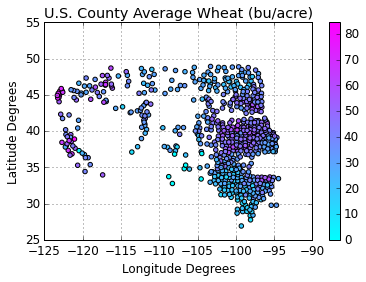

In [99]:
fig = plt.figure()
plt.style.use('classic')
plt.scatter(dlon, dlat, c=dv, cmap='cool')
plt.colorbar()
plt.title("U.S. County Average Wheat (bu/acre)")
plt.xlabel("Longitude Degrees")
plt.ylabel("Latitude Degrees")
plt.grid()